## MULTIPLE LINEAR REGRESSION explained in detailed

（文章来源： https://pythonfordatascienceorg.wordpress.com/linear-regression-python/ ）

Linear regression models are used to analyze the relationship between an independent variable (IV) or variables and a dependent variable (DV), a.k.a the predicted variable. If only one predictor variable (IV) is used in the model, then that is called a single linear regression model. However, the model will not be robust in design and will have little to no explanation power because in the real world there is no 1 variable that can fully explain, or predict, an outcome. Most commonly, the model will have multiple IVs which will make it a multiple linear regression model.

线性回归模型用于分析自变量（IV）或变量与因变量（DV）之间的关系，即预测变量。如果模型中仅使用一个预测变量（IV），则称为单一线性回归模型。然而，该模型在设计上并不稳健，而且几乎没有解释力，因为在现实世界中，没有一个变量可以完全解释或预测结果。最常见的是，该模型将有多个IVs，这将使其成为一个多元线性回归模型。

Assumptions for multiple linear regression:

> The DV has to be measured on a continuous level
> Linear relationship between the DV and each of the IV
> - There needs to be a theoretical reason as to why it would be expected that as one increases the other increase or decreases

> Data must not have multicollinearity 数据不得具有多重共线性
> - This is a large concern when conducting linear regressions. One way to check for multicollinearity is to run a correlation matrix on the data or to check the variance inflation factors (VIFs). If there are strong correlations between the IVs, or a high VIF, then one could drop one of the variables or conduct a Shapley’s regression or Ridge regression which takes into account the highly correlated variables

> The residual errors should be approximately normally distributed 残差应近似为正态分布
> - One can test this by using the Kolmogorov-Smirnov test, Jarque–Bera test, or the Shapiro-Wilk test for normality on the models residuals and/or by looking at a Q-Q plot of the model’s residuals
> - One thing to keep in mind is that as the sample size increases, the likelihood of violating this assumption increases

> Homoscedasticity should be present 应存在同质性
> - We can check this by plotting the data as a scatter plot and checking if there is a cone shape, or by using the Levene’s test for homogeneity of variance, Breusch-Pagan test, and/or the NCV test

> Independence of errors eror的独立性
> - This can be tested using the Durbin-Watson test


Often times when using real world data, there will be violations. If the residuals violate the assumptions of homoscedasticity and/or normality, then you can try transforming the data or using a robust regression model (discussed below). If no transformations or corrections are made to the data/model, then one will have difficulties generalizing the model to the population, i.e. the findings should be limited to the sample used. 通常情况下，在使用真实数据时，多多少少会出现违规情况。如果残差违反了同质性和/或正态性的假设，则可以尝试转换数据或使用稳健回归模型。如果没有对数据/模型进行转换或更正，则很难将模型推广到人群中，即调查结果应限于使用的样本。

Data in this section is from Kaggle.com from the user Miri Choi. This data set contains information on insurance premium charges, age, sex, BMI, number of children, smoker status, and region. The question being asked is, what are the most influential predictors of insurance premium charges? This makes the DV be the insurance premium charge and the IVs are the other variables in the data.

In [2]:
import pandas as pd

df= pd.read_csv("Data_insurance.csv")

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


检查数据，可以看到，默认情况下Python忽略了分类变量。

为了查看这些变量，必须单独调用这些变量的方法。Python之所以这样做，是因为数据集包含连续变量和和分类变量以及提供的信息。describle（）方法对于连续数据和分类数据是不同的。

In [4]:
df[['sex', 'smoker']].describe()

,sex,smoker
count,1338,1338
unique,2,2
top,male,no
freq,676,1064


### MULTIPLE LINEAR REGRESSION EXAMPLE

Before a multiple linear regression analysis can be conducted, one needs to import the required libraries, recode the categorical data to binary form, and check the assumptions!

In [5]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
import matplotlib.pyplot as plt

Now to recode the categorical data to binary form that way it can be included in the model. This means to code one category as 1, and the other as 0. If there are multiple categories in the variable, then one needs to create a dummy variable for each category. Always code the category outcome of interest as 1.

This is easy work using the “pd.get_dummies()” method. It automatically creates dummy variables and recodes them to binary form of 1 and 0. A 1 indicates the membership in that category and a 0 indicates non-membership.

In [6]:
df= pd.get_dummies(df)

# Dropping the dummy variable that are not needed
df.drop(['sex_male' , 'smoker_no'], axis=1 ,inplace= True)
df.describe()

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Assumption of Multicollinearity

Now let’s check for multicollinearity. When checking, it doesn’t really matter if the correlations are significant or not since that is not the purpose of running a correlation analysis in this context.

In [7]:
df.corr()

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-0.076185,0.002425,0.011156,-0.017117,0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.036945,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,-0.017117,0.068498,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,0.004184,-0.036945,-0.320177,-0.320829,-0.346265,1.000000


* There are no strong correlations between the IVs meaning there is no need to worry about multicollinearity.

## LINEAR REGRESSION MODEL

In [8]:
model = smf.ols("charges ~ age + bmi + sex_female + smoker_yes + children + region_northwest + region_southeast + region_southwest", data= df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:27:49   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.207e+04    999.649    -12.074      0.000    -1.4e+04   -1.01e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
sex_female         131.3144    332.945      0.394      0.693    -521.842     784.470
smoker_yes        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
children           475.5005    137.804      3.451      0.001     205.163     745.838
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         315.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assumption of Independent Errors

To test the assumption that the errors are independent, one can use the Durbin-Watson test; this is the method statsmodels.stats.stattools.durbin_watson(). For this test, a value of 2, or close to it, is ideal. The statistical value ranges between 0-4 where a value closer to 0 is more evidence for positive serial correlation and a value closer to 4 is more evidence for negative serial correlation.

In order to run this test, you have to create the model within Python before hand. Skipping that portion here, it is in the respective section on the page.

In [9]:
statsmodels.stats.stattools.durbin_watson(model.resid)

2.088422998667309

### Assumption of Normality of the Residuals
It is often miss-understood about what normality is being tested. For linear regression, it is the residuals- not the variables themselves. This can be tested with the Kolmogorov-Smirnov test, Jarque–Bera test, or the Shapiro-Wilk test for normality on the model’s residuals. For this example, the Jarque-Bera test will be used which is the sms.jarque_bera() method.

Again, this test is to be conducted on the model’s residuals. The model is developed in it’s appropriate section (below) and is referenced here.

In [10]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
lzip(name, test)

[('Jarque-Bera', 718.8872635707938),
 ('Chi^2 two-tail prob.', 7.863468661810329e-157),
 ('Skew', 1.2112110051671938),
 ('Kurtosis', 5.6507942983740245)]

The test is significant; meaning the data violates the assumption of normality of the residuals. Given that we have a large sample in this data (N= 1,338), that is likely to occur. As the sample size increases, the more likely the data will violate this assumption. There are a couple more steps to take in order to decide what action is required. They are, explore the distribution shape of the DV and the IVs, and their errors, to see if the distribution fits a better model and/or to transform the data in order to make it normal and the residuals normal.

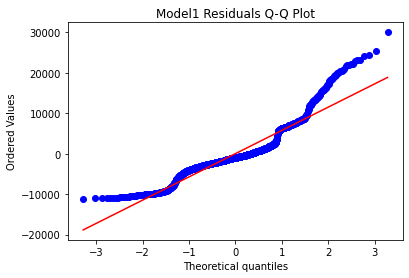

In [11]:
#Running plot & giving it a title
stats.probplot(model.resid, dist="norm", plot= plt)
plt.title("Model1 Residuals Q-Q Plot")

#Saving plot as a png
plt.savefig("Model1_Resid_qqplot.png")

### Assumption of Homoscedasticity
The assumption of homoscedasticity is a vital assumption for linear regression. If this assumption is violated, then the standard errors will be biased. The standard errors are used to conduct significance tests, and calculate the confidence intervals.

This can be tested using a residual vs. fitted values plot, looking at a scatter plot (if a cone shape is present then heteroscedasticity is present), or by using a statistical test such as Bruesch-Pagan, Cook-Weisberg test, or White general test. In this example, the Bruesch-Pagan test will be used.

In [ ]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

The test is significant meaning the data violates the assumption of homoscedasticity, i.e. heteroscedasticity is present in the data. What to do? Either one can transform the variables to improve the model, or use a robust regression method that accounts for the heteroscedasticity.

In order to account for the heteroscedasticity in the data, one has to select a heteroscedasticity consistent covariance matrix (HCCM) and pass it in the “cov_type=” argument apart of the .fit() method. What is HCCM? Here is a nice read if interested more on this. There are a few HCCMs to choose from:

* HC0, not good on sample size ≤ 250
* HC1, not good on sample size ≤ 250
* HC2, good on sample size ≤ 250
* HC3, which out performs HC0, HC1, and HC2 when sample size ≤ 250
* Little difference in performance when sample is ≥ 500

In [ ]:
model3 = smf.ols("charges ~ age + bmi + sex_female + smoker_yes + children + region_northwest + region_southeast + region_southwest", data= df).fit(cov_type='HC3')

model3.summary()

There are differences in the models and their results. Accounting for the heteroscedasiticity has altered the F-statistics, the standard errors, and etc. The second model, model3, is a better model.

You don’t have to test for the assumptions of independent errors (Durban-Watson), normality of residuals (Jarque-Bera), or the presence of homoscedasticity (Omnibus/Breusch-Pagan) before running the model because they are provided with the model. I wanted you to see them beforehand with a bit more explanation of each assumption. One does however, have to check for the presence of multicollinearity before running the model.